# Stunting Project

## Import Library

In [1]:
# Meng-import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Membuat Dataframe

In [2]:
# Membaca dataset dan mengubahnya menjadi dataframe
#df = pd.read_csv("stunting_data.csv")
df = pd.read_csv("stunting_data_.csv")
df

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,_zlen,Status Stunting
0,3.3,1,1,1,8.5,79.2,6,12,1,0,1,0,0,680333.3,383777.8,435500.0,2.289686,0
1,4.1,1,1,1,11.2,77.9,9,12,1,0,0,0,0,784333.3,408861.1,732333.3,1.204116,0
2,4.0,1,1,1,11.4,85.0,12,12,1,0,1,1,0,496166.7,580944.4,117000.0,4.270555,0
3,3.5,1,1,1,10.0,95.2,12,17,1,1,1,1,0,2415833.0,1704972.0,721500.0,8.232287,0
4,1.8,0,1,1,9.5,77.0,12,12,1,0,0,1,0,2442267.0,1001087.0,1787933.0,1.163313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,3.2,1,1,2,10.8,88.4,4,7,1,0,0,1,0,1644500.0,800041.7,1462500.0,0.186388,0
1557,3.6,1,0,3,19.1,102.2,19,12,1,0,1,1,0,1161333.0,760950.0,632666.7,1.459655,0
1558,3.0,1,1,5,13.0,98.6,12,12,1,0,0,0,0,751833.3,403027.8,582833.3,-2.602528,1
1559,2.8,1,1,1,8.9,76.5,12,12,1,1,0,1,0,6276833.0,4933834.0,2855667.0,0.614873,0


In [3]:
# Drop kolom yang tidak digunakan
df.drop(columns=["_zlen"], inplace=True)
df

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
0,3.3,1,1,1,8.5,79.2,6,12,1,0,1,0,0,680333.3,383777.8,435500.0,0
1,4.1,1,1,1,11.2,77.9,9,12,1,0,0,0,0,784333.3,408861.1,732333.3,0
2,4.0,1,1,1,11.4,85.0,12,12,1,0,1,1,0,496166.7,580944.4,117000.0,0
3,3.5,1,1,1,10.0,95.2,12,17,1,1,1,1,0,2415833.0,1704972.0,721500.0,0
4,1.8,0,1,1,9.5,77.0,12,12,1,0,0,1,0,2442267.0,1001087.0,1787933.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,3.2,1,1,2,10.8,88.4,4,7,1,0,0,1,0,1644500.0,800041.7,1462500.0,0
1557,3.6,1,0,3,19.1,102.2,19,12,1,0,1,1,0,1161333.0,760950.0,632666.7,0
1558,3.0,1,1,5,13.0,98.6,12,12,1,0,0,0,0,751833.3,403027.8,582833.3,1
1559,2.8,1,1,1,8.9,76.5,12,12,1,1,0,1,0,6276833.0,4933834.0,2855667.0,0


# Exploratory Data Analysis (EDA)

## Shape of Data

In [4]:
df.shape

(1561, 17)

Data terdiri dari 1561 baris dengan 18 kolom, yang berarti terdapat 1561 records data dengan 13 fitur

In [5]:
df.columns

Index(['Berat Lahir (kg)', 'Status Premature', 'ASI', 'Usia', 'Berat (kg)',
       'Tinggi (cm)', 'Pendidikan Ayah', 'Pendidikan Ibu', 'Pekerjaan Ayah',
       'Pekerjaan Ibu', 'Air', 'Toilet', 'Merokok', 'hhfood', 'xprotein',
       'pce', 'Status Stunting'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Berat Lahir (kg)  1561 non-null   float64
 1   Status Premature  1561 non-null   int64  
 2   ASI               1561 non-null   int64  
 3   Usia              1561 non-null   int64  
 4   Berat (kg)        1561 non-null   float64
 5   Tinggi (cm)       1561 non-null   float64
 6   Pendidikan Ayah   1561 non-null   int64  
 7   Pendidikan Ibu    1561 non-null   int64  
 8   Pekerjaan Ayah    1561 non-null   int64  
 9   Pekerjaan Ibu     1561 non-null   int64  
 10  Air               1561 non-null   int64  
 11  Toilet            1561 non-null   int64  
 12  Merokok           1561 non-null   int64  
 13  hhfood            1561 non-null   float64
 14  xprotein          1561 non-null   float64
 15  pce               1561 non-null   float64
 16  Status Stunting   1561 non-null   int64  


Ini adalah nama-nama fitur yang terdapat dalam data. "Status Stunting" adalah fitur targetnya.

In [7]:
df.dtypes

Berat Lahir (kg)    float64
Status Premature      int64
ASI                   int64
Usia                  int64
Berat (kg)          float64
Tinggi (cm)         float64
Pendidikan Ayah       int64
Pendidikan Ibu        int64
Pekerjaan Ayah        int64
Pekerjaan Ibu         int64
Air                   int64
Toilet                int64
Merokok               int64
hhfood              float64
xprotein            float64
pce                 float64
Status Stunting       int64
dtype: object

Terdapat 6 fitur numerikal dan 11 fitur kategorikal/ordinal pada data.

## Cek Missing Value

In [8]:
df.isnull().sum()

Berat Lahir (kg)    0
Status Premature    0
ASI                 0
Usia                0
Berat (kg)          0
Tinggi (cm)         0
Pendidikan Ayah     0
Pendidikan Ibu      0
Pekerjaan Ayah      0
Pekerjaan Ibu       0
Air                 0
Toilet              0
Merokok             0
hhfood              0
xprotein            0
pce                 0
Status Stunting     0
dtype: int64

Tidak terdapat missing value pada data. Data bisa langsung dianalisis dan diolah.

In [9]:
df.describe()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
count,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1.561000e+03,1.561000e+03,1.561000e+03,1561.000000
mean,3.137079,0.923126,0.964126,2.527867,12.732415,89.186996,9.756566,9.707880,0.937860,0.358104,0.610506,0.803331,0.012172,1.907425e+06,9.715076e+05,1.228660e+06,0.170404
std,0.678774,0.266476,0.186037,1.417618,4.283563,15.041222,3.931912,3.731776,0.241486,0.479597,0.487792,0.397607,0.109687,1.163948e+06,7.576923e+05,8.611684e+05,0.376107
min,1.000000,0.000000,0.000000,1.000000,2.500000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.450000e+04,1.316429e+05,0.000000e+00,0.000000
25%,2.800000,1.000000,1.000000,1.000000,9.700000,79.000000,6.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.137933e+06,5.509444e+05,6.803334e+05,0.000000
50%,3.100000,1.000000,1.000000,2.000000,12.500000,90.800000,9.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.635833e+06,7.968888e+05,1.035667e+06,0.000000
75%,3.500000,1.000000,1.000000,4.000000,15.100000,101.200000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.374667e+06,1.129438e+06,1.575167e+06,0.000000
max,9.990000,1.000000,1.000000,5.000000,36.600000,126.500000,22.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.190000e+07,1.410000e+07,1.260000e+07,1.000000


Dapat dilihat dari tabel di atas, bahwa fitur "Tinggi" memiliki skala yang jauh lebih besar dibandingkan dengan fitur lainnya. Ini berarti kita harus melakukan normalisasi/standarisasi data agar semua data memiliki skala yang sama.

## Uji Validitas - Cek Korelasi Data

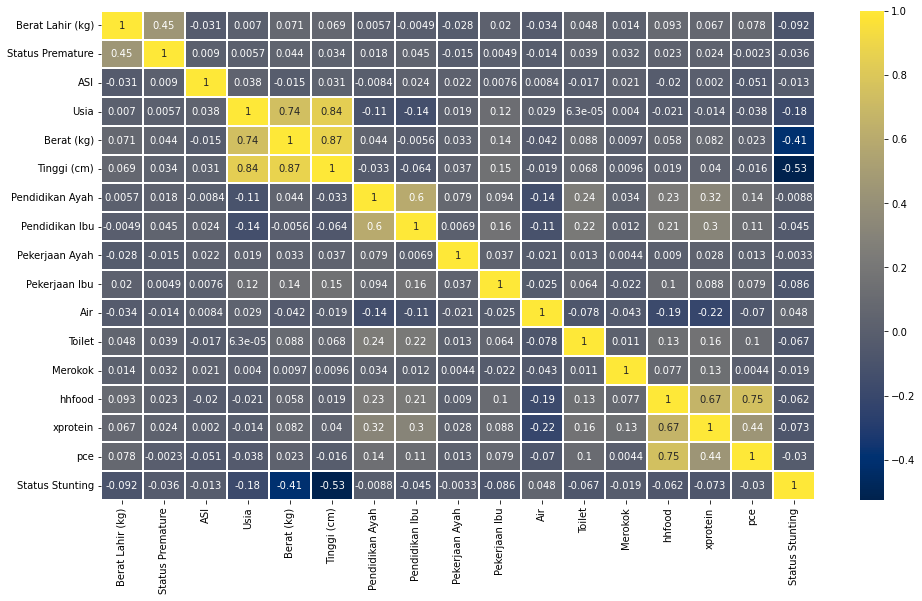

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap ='cividis',linewidth = 0.30, annot = True)
plt.show()

## Uji Realibitilas - Cronbach Alpha

### Keandalan Cronbach Alpha (Cronbach's Alpha Reliability)

### 1. Definisi

- Cronbach Alpha adalah sebuah estimasi dari keandalan (reliability)
- Lebih spesifiknya adalah estimasi dari konsistensi internal, sehingga bisa kita simpulkan bahwa Cronbach Alpha juga merupakan indikator dari konsistensi
- Dilambangkan oleh koefisian alpha
- Chronbach Alpha bukanlah ukuran dari kehomogenan dan bukan juga ukuran unidimensionalitas
- Konsistensi dalam melakukan pengukuran adalah sesuatu hal yang baik

### 2. Rules

- Nilainya berada di antara .00 - 1.0
- Jika nilainya .00 = pengukuran yang dilakukan tidak konsisten
- Jika nilainya 1.0 = pengukuran yang dilakukan dalam konsistensi yang sempurna (perfect)
- Contoh: 0.7 (nilai minimum tingkat keandalan Cronbach Alpha) = 70% dari variansi di dalam skor adalah variansi yang andal (reliable)
    - Yang berarti 30% sisanya adalah error dari variansi

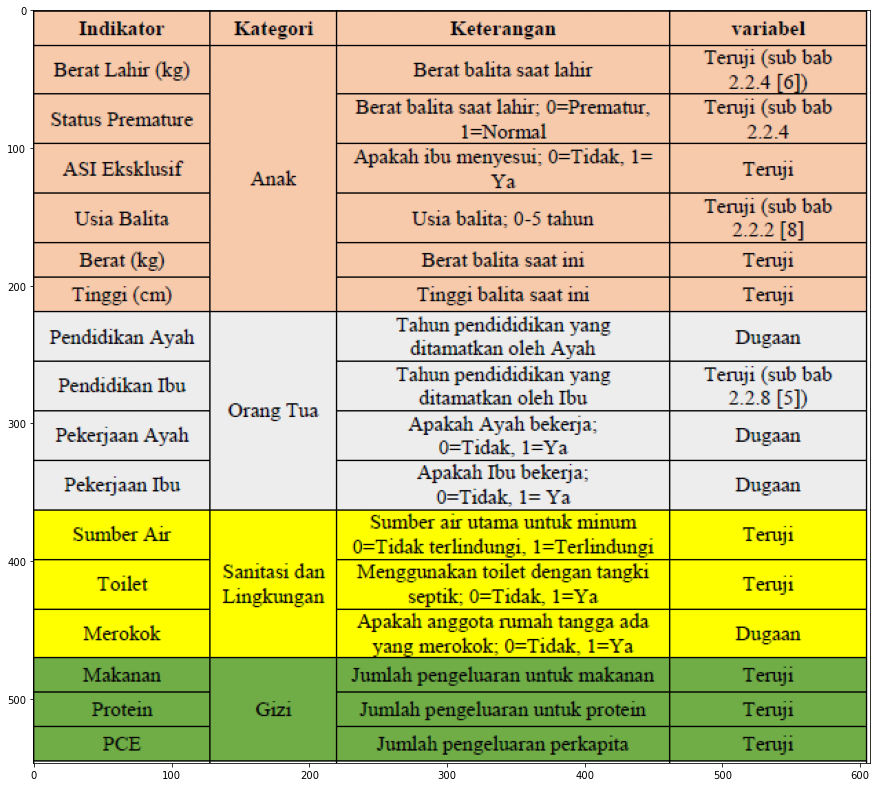

In [11]:
plt.figure(figsize = (15,15))
img = mpimg.imread('stunting_variables.png')
imgplot = plt.imshow(img)
plt.show()

Terdapat 4 kategori dalam data yang akan diuji realibilitasnya:
- Anak = Gabungan dari fitur "Berat Lahir (kg)", "Status Premature", "ASI", "Usia", "Berat (kg)", dan "Tinggi (cm)"
- OT (Orang Tua) = Gabungan dari fitur "Pendidikan Ayah", "Pendidikan Ibu", "Pekerjaan Ayah", dan "Pekerjaan Ibu"
- SnL (Sanitasi dan Lingkungan) = Gabungan dari fitur "Sumber Air", "Toilet", dan "Merokok"
- Gizi = Gabungan dari fitur "Makanan", "Protein" dan "pce"

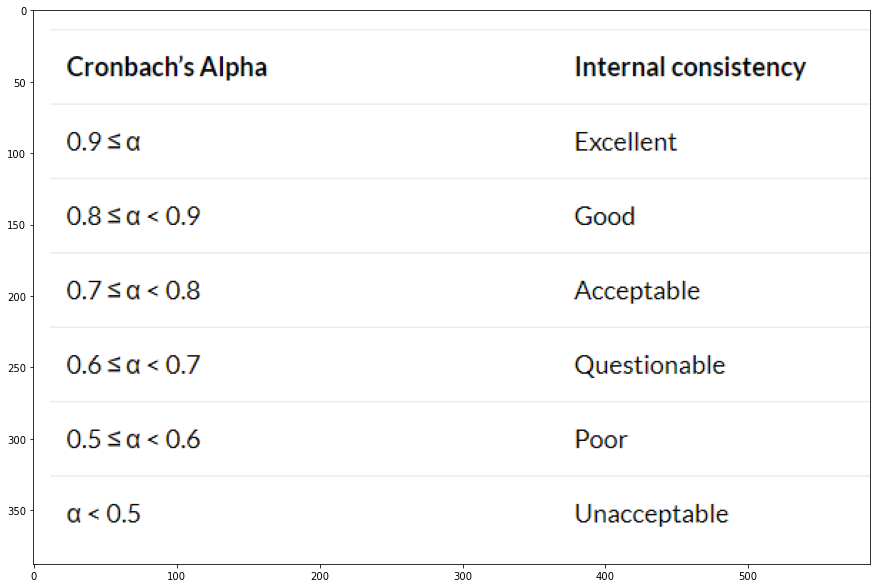

In [12]:
plt.figure(figsize = (15,15))
img2 = mpimg.imread('cronbach_alpha.png')
imgplot2 = plt.imshow(img2)
plt.show()

## 1. Gunakan Pingouine Library

In [13]:
import pingouin as pg
from sklearn.preprocessing import StandardScaler, MinMaxScaler, No

std = StandardScaler()
std2 = MinMaxScaler()
std3 = Normalizer()
df_std = std.fit_transform(df)
df_std2 = std2.fit_transform(df)
df_std3 = std3.fit_transform(df)
df2 = pd.DataFrame(df_std)
df22 = pd.DataFrame(df_std2)
df222 = pd.DataFrame(df_std3)
print("Standard Scaler:", pg.cronbach_alpha(data=df2))
print("MinMax Scaler:",pg.cronbach_alpha(data=df22))
print("Normalize Scaler:",pg.cronbach_alpha(data=df222))
print("Tanpa Scaler", pg.cronbach_alpha(data=df))

Standard Scaler: (0.487222603503894, array([0.449, 0.524]))
MinMax Scaler: (0.20551728460757404, array([0.147, 0.262]))
Normalize Scaler: (-11.906654241333774, array([-12.859, -10.992]))
Tanpa Scaler (0.583639077497836, array([0.553, 0.613]))


## 2. Menggunakan Fungsi Cronbach Alpha

In [14]:
# Membuat fungsi Cronbach Alpha
def cronbach_alpha(df):
    # 1. Transform dataframe menjadi correlation matrix
    df_corr = df.corr()
    
    # 2.1 Hitung N
    # Jumlah variabel sama dengan jumlah kolom dalam dataframe
    N = df.shape[1]
    
    # 2.2 Hitung R
    # Looping ke semua kolom dan append setiap korelasi yang relevan ke dalam array "r_s"
    # Lalu hitung mean dari "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Gunakan rumus untuk menghitung Cronbach Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [15]:
df.head()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
0,3.3,1,1,1,8.5,79.2,6,12,1,0,1,0,0,680333.3,383777.8,435500.0,0
1,4.1,1,1,1,11.2,77.9,9,12,1,0,0,0,0,784333.3,408861.1,732333.3,0
2,4.0,1,1,1,11.4,85.0,12,12,1,0,1,1,0,496166.7,580944.4,117000.0,0
3,3.5,1,1,1,10.0,95.2,12,17,1,1,1,1,0,2415833.0,1704972.0,721500.0,0
4,1.8,0,1,1,9.5,77.0,12,12,1,0,0,1,0,2442267.0,1001087.0,1787933.0,0


In [17]:
df_anak = df.loc[:,"Berat Lahir (kg)":"Tinggi (cm)"]
print(cronbach_alpha(df_anak))
print(pg.cronbach_alpha(data=df_anak))

0.6163576038006643
(0.47153127334989653, array([0.43 , 0.511]))


In [18]:
df_berat_lahir = df2.loc[:,0:6]
df_berat_lahir
print(cronbach_alpha(df_berat_lahir))
print(pg.cronbach_alpha(data=df_berat_lahir))

0.5468786290362143
(0.5468786290362141, array([0.512, 0.58 ]))


In [19]:
df_OT1 = df.loc[:,"Pendidikan Ayah":"Pekerjaan Ibu"]
print(cronbach_alpha(df_OT1))
print(pg.cronbach_alpha(data=df_OT1))

0.436817224958357
(0.5138854698893757, array([0.473, 0.552]))


In [20]:
df_orang = df2.loc[:,6:10]
df_orang
print(cronbach_alpha(df_orang))
print(pg.cronbach_alpha(data=df_orang))

0.2656185286283038
(0.2656185286283033, array([0.206, 0.322]))


In [21]:
df_OT2 = df.loc[:,"Pendidikan Ayah":"Pendidikan Ibu"]
print(cronbach_alpha(df_OT2))
print(pg.cronbach_alpha(data=df_OT2))

0.7473682206394175
(0.7467298688227637, array([0.72 , 0.771]))


In [22]:
df_SnL = df.loc[:,"Air":"Merokok"]
print(cronbach_alpha(df_SnL))
print(pg.cronbach_alpha(data=df_SnL))

-0.11895526092797833
(-0.13587814241594798, array([-0.237, -0.042]))


In [23]:
df_orang = df2.loc[:,10:13]
df_orang
print(cronbach_alpha(df_orang))
print(pg.cronbach_alpha(data=df_orang))

-0.06144423662011997
(-0.061444236620120066, array([-0.15 ,  0.022]))


In [24]:
df_Gizi = df.loc[:,"hhfood":"pce"]
print(cronbach_alpha(df_Gizi))
print(pg.cronbach_alpha(data=df_Gizi))

0.8299087219380297
(0.8239597063522914, array([0.808, 0.839]))


In [25]:
df_orang = df2.loc[:,13:15]
df_orang
print(cronbach_alpha(df_orang))
print(pg.cronbach_alpha(data=df_orang))

0.8299087219380296
(0.8299087219380297, array([0.815, 0.844]))


In [26]:
#from sklearn.preprocessing import StandardScaler

#std = StandardScaler()
#df_all = df.loc[:,"Berat Lahir (kg)":"pce"]
#df_std = df_all.std
#df_all_std = std.transform(df_all_std)
#cronbach_alpha(df_std)

## Cek Numerikal Data Outlier

### 1. Berat Lahir

<AxesSubplot:xlabel='Berat Lahir (kg)'>

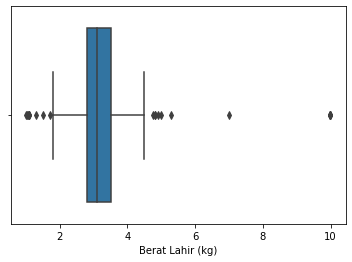

In [27]:
sns.boxplot(x=df["Berat Lahir (kg)"])

### 2. Usia

<AxesSubplot:xlabel='Usia'>

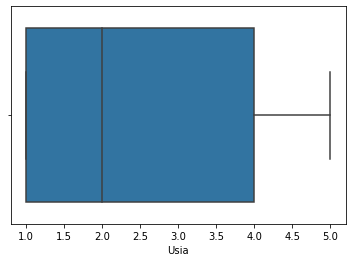

In [28]:
sns.boxplot(x=df["Usia"])

### 3. Berat (saat ini)

<AxesSubplot:xlabel='Berat (kg)'>

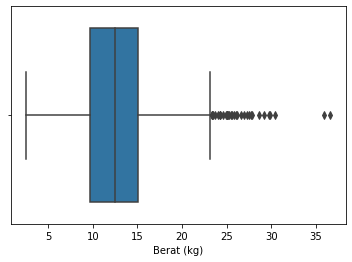

In [29]:
sns.boxplot(x=df["Berat (kg)"])

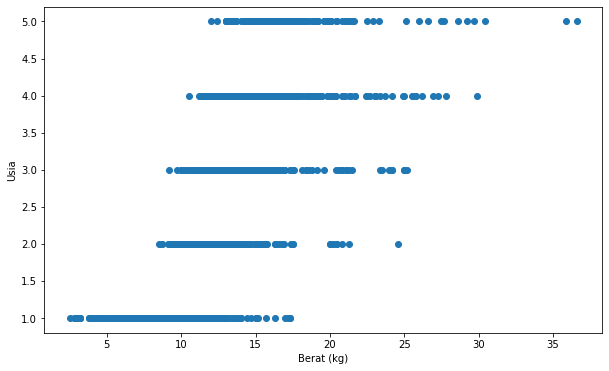

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Berat (kg)"], df["Usia"])
ax.set_xlabel("Berat (kg)")
ax.set_ylabel("Usia")
plt.show()

### 3. Tinggi

<AxesSubplot:xlabel='Tinggi (cm)'>

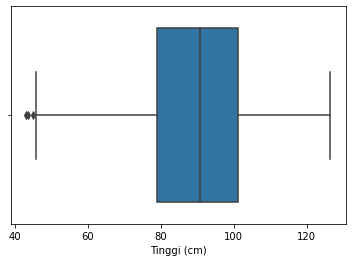

In [31]:
sns.boxplot(x=df["Tinggi (cm)"])

### 4. hhfood (Pengeluaran Makanan)

<AxesSubplot:xlabel='hhfood'>

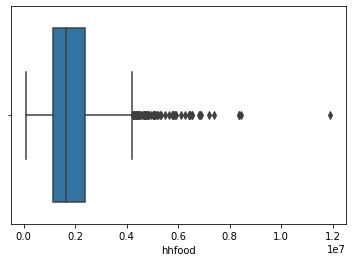

In [32]:
sns.boxplot(x=df["hhfood"])

### 5. xprotein (Pengeluaran Protein)

<AxesSubplot:xlabel='xprotein'>

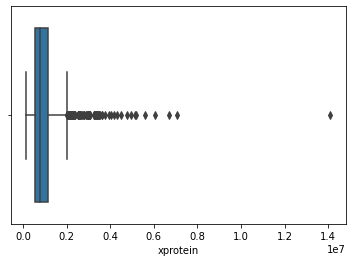

In [33]:
sns.boxplot(x=df["xprotein"])

### 6. pce (Price Consumption Expenditure)

<AxesSubplot:xlabel='pce'>

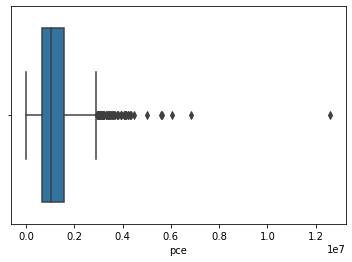

In [34]:
sns.boxplot(x=df["pce"])

## Target Data (Status Stunting)

In [35]:
df["Status Stunting"].value_counts()

0    1295
1     266
Name: Status Stunting, dtype: int64

<AxesSubplot:xlabel='Status Stunting', ylabel='count'>

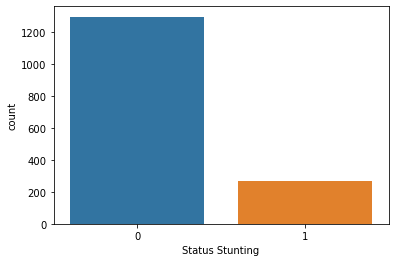

In [36]:
sns.countplot(x="Status Stunting", data=df)

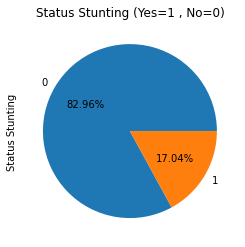

In [37]:
df["Status Stunting"].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Status Stunting (Yes=1 , No=0)')
plt.show()

## Numeric Data vs Target

### 1. Berat Lahir vs Target

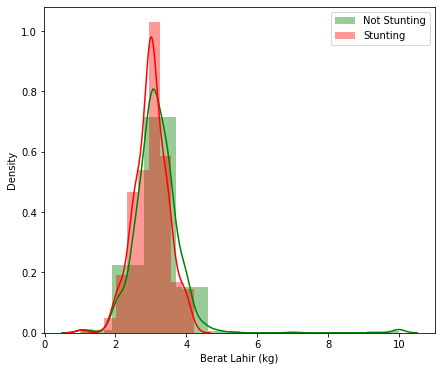

In [38]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Berat Lahir (kg)"][df["Status Stunting"] == 0], bins=10, color='g', label="Not Stunting")
sns.distplot(df["Berat Lahir (kg)"][df["Status Stunting"] == 1], bins=10, color='r', label="Stunting")
plt.legend()

### 2. Usia vs Target

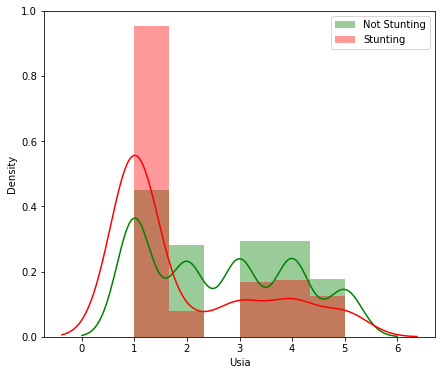

In [39]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Usia"][df["Status Stunting"] == 0], bins=6, color='g', label="Not Stunting")
sns.distplot(df["Usia"][df["Status Stunting"] == 1], bins=6, color='r', label="Stunting")
plt.legend()

### 3. Berat vs Target

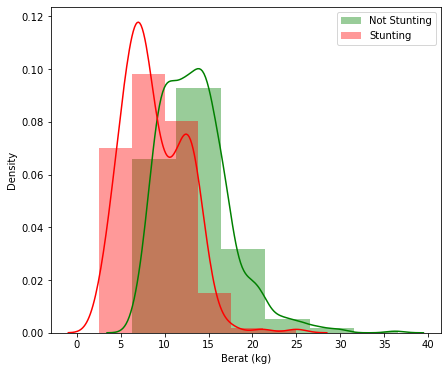

In [40]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Berat (kg)"][df["Status Stunting"] == 0], bins=6, color='g', label="Not Stunting")
sns.distplot(df["Berat (kg)"][df["Status Stunting"] == 1], bins=6, color='r', label="Stunting")
plt.legend()

### 4. Tinggi vs Usia

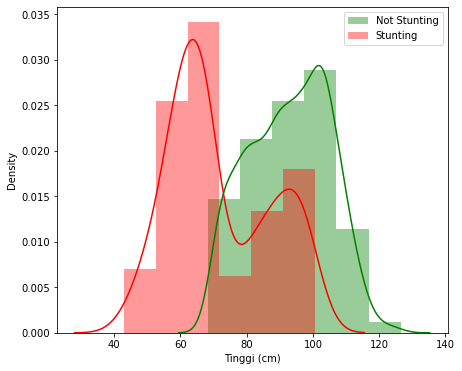

In [41]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Tinggi (cm)"][df["Status Stunting"] == 0], bins=6, color='g', label="Not Stunting")
sns.distplot(df["Tinggi (cm)"][df["Status Stunting"] == 1], bins=6, color='r', label="Stunting")
plt.legend()

### 5. Pendidikan Ayah vs Target

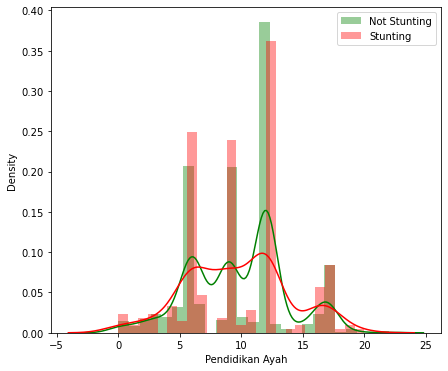

In [42]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Pendidikan Ayah"][df["Status Stunting"] == 0], bins=25, color='g', label="Not Stunting")
sns.distplot(df["Pendidikan Ayah"][df["Status Stunting"] == 1], bins=25, color='r', label="Stunting")
plt.legend()

### 6. Pendidikan Ibu vs Target

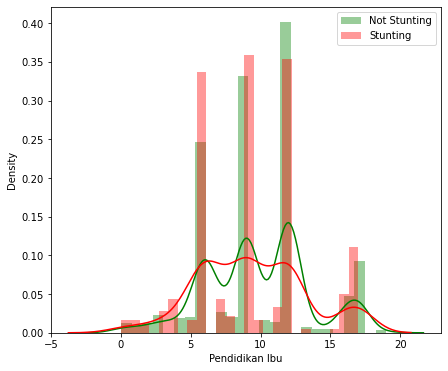

In [43]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Pendidikan Ibu"][df["Status Stunting"] == 0], bins=25, color='g', label="Not Stunting")
sns.distplot(df["Pendidikan Ibu"][df["Status Stunting"] == 1], bins=25, color='r', label="Stunting")
plt.legend()

### 7. hhfood vs Target

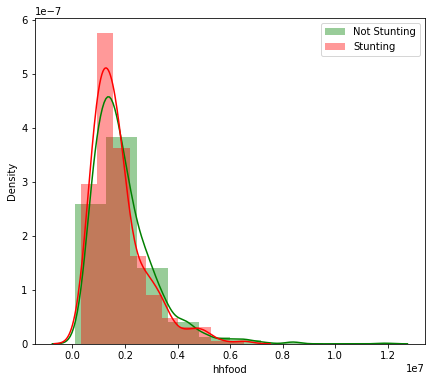

In [44]:
plt.figure(figsize=(7, 6))
sns.distplot(df["hhfood"][df["Status Stunting"] == 0], bins=10, color='g', label="Not Stunting")
sns.distplot(df["hhfood"][df["Status Stunting"] == 1], bins=10, color='r', label="Stunting")
plt.legend()

### 8. xprotein vs Target

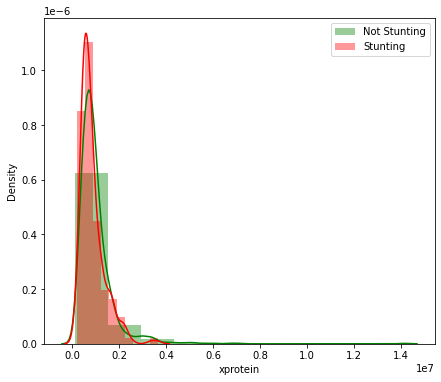

In [45]:
plt.figure(figsize=(7, 6))
sns.distplot(df["xprotein"][df["Status Stunting"] == 0], bins=10, color='g', label="Not Stunting")
sns.distplot(df["xprotein"][df["Status Stunting"] == 1], bins=10, color='r', label="Stunting")
plt.legend()

### 9. pce vs Target

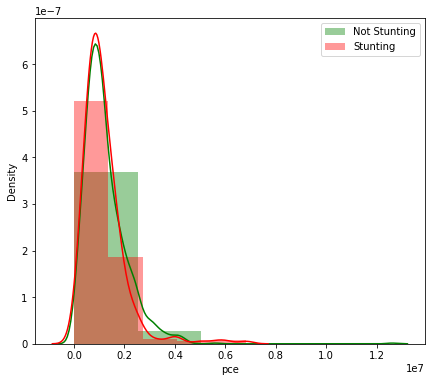

In [46]:
plt.figure(figsize=(7, 6))
sns.distplot(df["pce"][df["Status Stunting"] == 0], bins=5, color='g', label="Not Stunting")
sns.distplot(df["pce"][df["Status Stunting"] == 1], bins=5, color='r', label="Stunting")
plt.legend()

## Categoric/Ordinal Data vs Target

In [47]:
pd.crosstab(df["Status Premature"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
Status Premature,,
0,0.783333,0.216667
1,0.833449,0.166551


In [48]:
pd.crosstab(df["ASI"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
ASI,,
0,0.803571,0.196429
1,0.830565,0.169435


In [49]:
pd.crosstab(df["Pekerjaan Ayah"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
Pekerjaan Ayah,,
0,0.824742,0.175258
1,0.829918,0.170082


In [50]:
pd.crosstab(df["Pekerjaan Ibu"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
Pekerjaan Ibu,,
0,0.805389,0.194611
1,0.872987,0.127013


In [51]:
pd.crosstab(df["Air"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
Air,,
0,0.851974,0.148026
1,0.815320,0.184680


In [52]:
pd.crosstab(df["Toilet"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
Toilet,,
0,0.778502,0.221498
1,0.842105,0.157895


In [53]:
pd.crosstab(df["Merokok"], df["Status Stunting"], normalize="index")

Status Stunting,0,1
Merokok,,
0,0.828794,0.171206
1,0.894737,0.105263


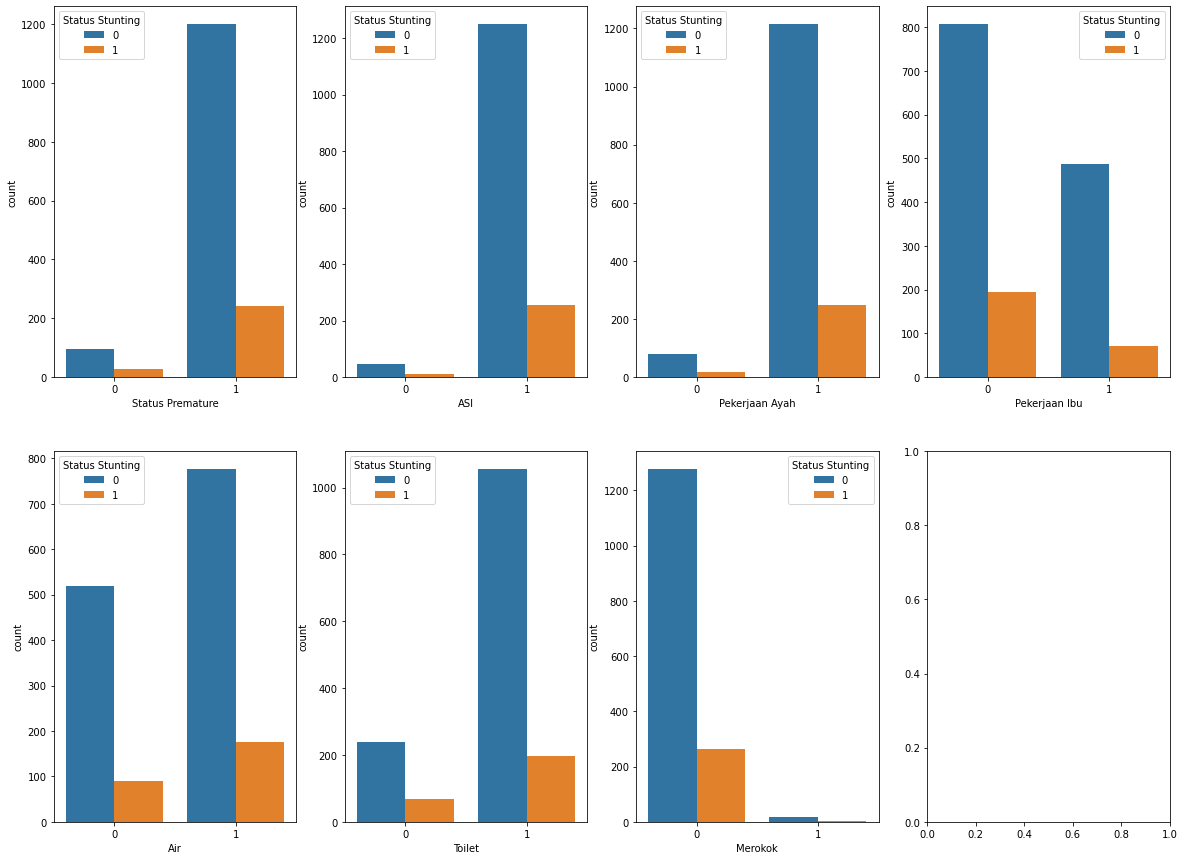

In [54]:
cat_var = ["Status Premature", "ASI", "Pekerjaan Ayah", "Pekerjaan Ibu", "Air", "Toilet", "Merokok"]

fig, axes = plt.subplots(2, 4, figsize=(20, 15))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Status Stunting", ax=ax)

## Tambahkan SMOTE

## Splitting & Training Data

In [55]:
X = df.drop(columns="Status Stunting")
y = df["Status Stunting"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 16), (313, 16), (1248,), (313,))

### Preprocessor

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [57]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
df.head()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
0,3.3,1,1,1,8.5,79.2,6,12,1,0,1,0,0,680333.3,383777.8,435500.0,0
1,4.1,1,1,1,11.2,77.9,9,12,1,0,0,0,0,784333.3,408861.1,732333.3,0
2,4.0,1,1,1,11.4,85.0,12,12,1,0,1,1,0,496166.7,580944.4,117000.0,0
3,3.5,1,1,1,10.0,95.2,12,17,1,1,1,1,0,2415833.0,1704972.0,721500.0,0
4,1.8,0,1,1,9.5,77.0,12,12,1,0,0,1,0,2442267.0,1001087.0,1787933.0,0


In [60]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["Berat Lahir (kg)", "Usia", "Berat (kg)", "Tinggi (cm)", "Pendidikan Ayah", "Pendidikan Ibu", "hhfood", "xprotein", "pce"]),
    ("categoric", categorical_pipeline, ["Status Premature", "ASI", "Pekerjaan Ayah", "Pekerjaan Ibu", "Air", "Toilet", "Merokok"])
])

### Pipeline

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [63]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Berat Lahir (kg)', 'Usia',
                                                   'Berat (kg)', 'Tinggi (cm)',
                                                   'Pendidikan Ayah',
                                                   'Pendidikan Ibu', 'hhfood',
                                                   'xprotein', 'pce']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   

In [64]:
pipeline.score(X_test, y_test)

0.8753993610223643

### GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameter = {
    "algo__n_neighbors": range(1, 51),
    "algo__weights": ["uniform", "distance"],
    "algo__p": [1, 2]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Berat '
                                                                          'Lahir '
                                                                          '(kg)',
                                                                          'Usia',
                                                                          'Berat '
                  

In [67]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
29,0.017522,0.001075,0.021542,0.000704,8,1,distance,"{'algo__n_neighbors': 8, 'algo__p': 1, 'algo__...",0.875000,0.882212,0.862981,0.873397,0.007932,1
21,0.022691,0.004685,0.025278,0.002929,6,1,distance,"{'algo__n_neighbors': 6, 'algo__p': 1, 'algo__...",0.872596,0.877404,0.860577,0.870192,0.007077,2
45,0.021543,0.003656,0.051129,0.037577,12,1,distance,"{'algo__n_neighbors': 12, 'algo__p': 1, 'algo_...",0.870192,0.872596,0.867788,0.870192,0.001963,2
49,0.022405,0.002437,0.025277,0.001075,13,1,distance,"{'algo__n_neighbors': 13, 'algo__p': 1, 'algo_...",0.865385,0.875000,0.870192,0.870192,0.003925,2
33,0.014075,0.000813,0.015511,0.002437,9,1,distance,"{'algo__n_neighbors': 9, 'algo__p': 1, 'algo__...",0.872596,0.872596,0.862981,0.869391,0.004533,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.016373,0.001219,0.033894,0.000407,48,2,uniform,"{'algo__n_neighbors': 48, 'algo__p': 2, 'algo_...",0.843750,0.831731,0.836538,0.837340,0.004939,195
196,0.015799,0.000407,0.037628,0.002843,50,1,uniform,"{'algo__n_neighbors': 50, 'algo__p': 1, 'algo_...",0.848558,0.829327,0.834135,0.837340,0.008172,195
182,0.015511,0.000703,0.036767,0.002664,46,2,uniform,"{'algo__n_neighbors': 46, 'algo__p': 2, 'algo_...",0.843750,0.831731,0.836538,0.837340,0.004939,195
174,0.018384,0.002150,0.035905,0.001464,44,2,uniform,"{'algo__n_neighbors': 44, 'algo__p': 2, 'algo_...",0.841346,0.831731,0.836538,0.836538,0.003925,199


In [68]:
model.best_params_

{'algo__n_neighbors': 8, 'algo__p': 1, 'algo__weights': 'distance'}

In [69]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.8849840255591054)